ПИ19-3 Деменчук Георгий ML 3

# 2. Создание нейронной сети без использования готовых решений

__Автор__: Никита Владимирович Блохин (NVBlokhin@fa.ru)

Финансовый университет, 2020 г. 

In [1]:
import torch

## 1. Создание нейронов и полносвязных слоев

1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [2]:
class Neuron:
    def __init__(self, weights, bias):
        #Весы приезжают в конструктор и поля выставялются
        self.weights = weights
        self.bias = bias
        
    def forward(self, inputs):
        #Реализация логики слоя
        return torch.sum(self.weights * inputs) + self.bias

In [3]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14 #Значения с условия

my_neuron = Neuron(weights = weights, bias = bias)
my_neuron.forward(inputs)

tensor(4.8400)

1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат. 

In [4]:
class Linear:
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
    
    def forward(self, inputs):
        return torch.matmul(inputs, self.weights) + self.biases

In [5]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

linear = Linear(weights = weights, biases = biases)
linear.forward(inputs)

tensor([ 4.8400,  0.1700, 10.3900])

1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [6]:
class Linear:
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
        
    def forward(self, inputs):
        return torch.matmul(inputs, self.weights) + self.biases

In [7]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

linear = Linear(weights = weights, biases = biases)
linear.forward(inputs)

tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [8]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)
    
    def forward(self, inputs):
        # <реализовать логику слоя>
        return torch.matmul(inputs, self.weights) + self.biases

In [9]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

linear = Linear(n_features = 4, n_neurons = 3)
linear.forward(inputs)

tensor([[-4.5463, -0.8287,  2.1875],
        [-1.9707,  4.1097, -0.4691],
        [-4.2291, -1.5667, -0.7113]])

1.5 Используя решение из __1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7). 

In [10]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

linear_1 = Linear(n_features = 4, n_neurons = 3) #Раз слой
linear_2 = Linear(n_features = 3, n_neurons = 7) #Два слой
linear_2.forward(linear_1.forward(inputs)) #Возможно это как-то более красиво реализовать через связанные списки или map

tensor([[10.6524,  1.1344, -2.4302, 16.5143,  2.6520,  9.3473, -1.8940],
        [14.0756,  1.2235, -6.8608, 15.5578, -0.1584, 11.7437, -4.7030],
        [ 2.5397, -4.4351, -4.7012,  3.3121, -2.1977,  5.5713, -3.0740]])

## 2. Создание функций активации

2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [11]:
class MyInterface:
    def forward(self, inputs):
        raise NotImplementedError("Забыл функцию активации прописать")

In [12]:
class ReLU(MyInterface):
    
    def forward(self, inputs):
        #Реализация логики ReLu
        mask = inputs < 0
        inputs[mask] = 0
        return inputs

relu = ReLU()
matr = torch.randn((4, 3))
print("Input:\n", matr)
res = relu.forward(matr)
print("Output:\n", res)

Input:
 tensor([[-0.6100,  0.7583,  0.6552],
        [-0.3950, -0.4996,  1.2750],
        [ 1.1476, -0.1172,  0.1215],
        [-1.4317,  0.4525, -2.8569]])
Output:
 tensor([[0.0000, 0.7583, 0.6552],
        [0.0000, 0.0000, 1.2750],
        [1.1476, 0.0000, 0.1215],
        [0.0000, 0.4525, 0.0000]])


2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [13]:
class Softmax(MyInterface):
    def forward(self, inputs):
        up = torch.exp(inputs)
        down = torch.sum(torch.exp(inputs), dim = 1).view(-1, 1)
        res = up / down
        return res

softmax = Softmax()
matr = torch.randn((4, 3))
print("Input:\n", matr)

res = softmax.forward(matr)
print("Output:\n", res)

Input:
 tensor([[-0.7697,  0.4727, -0.0868],
        [ 1.6472, -0.3863, -1.0496],
        [ 0.1119,  0.9740, -1.7987],
        [ 0.0415, -0.8466,  0.3359]])
Output:
 tensor([[0.1552, 0.5376, 0.3072],
        [0.8345, 0.1092, 0.0563],
        [0.2844, 0.6735, 0.0421],
        [0.3632, 0.1494, 0.4874]])


2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [14]:
class ELU(MyInterface):
    def __init__(self, alpha):
        self.alpha = alpha
    
    def forward(self, inputs):
        inputs[inputs < 0] = (torch.exp(inputs[inputs < 0]) - 1) * self.alpha
        return inputs

elu = ELU(alpha = 1)
matr = torch.randn((4, 3))
print("Input:\n", matr)

res = elu.forward(matr)
print("Output:\n", res)

Input:
 tensor([[-2.2693,  0.7565,  0.7982],
        [ 1.5966,  1.5896, -1.2731],
        [-1.1644,  1.0362, -0.0390],
        [ 0.8897,  0.0516,  0.0617]])
Output:
 tensor([[-0.8966,  0.7565,  0.7982],
        [ 1.5966,  1.5896, -0.7200],
        [-0.6879,  1.0362, -0.0382],
        [ 0.8897,  0.0516,  0.0617]])


## 3. Создание функции потерь

3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [15]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return ((y_true - y_pred) ** 2).mean()

In [16]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [17]:
# слой с одним нероном
linear_layer = Linear(4, 1)

mse_loss = MSELoss()
res = mse_loss.forward(linear_layer.forward(inputs), y)
print(f'MSE: {res}')

MSE: 52.485164642333984


3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [18]:
class CategoricalCrossentropyLoss:
    def forward(self, y_pred, y_true):
        return -1 * (y_true * torch.log(y_pred)).sum(1)

In [19]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [20]:

linear_layer = Linear(4, 3) #Слой с 3 нейронами

softmax = Softmax()
cce_loss = CategoricalCrossentropyLoss()
res = cce_loss.forward(softmax.forward(linear_layer.forward(inputs)), y)
print(f'CCE loss: {res}')

CCE loss: tensor([4.9952, 0.0123, 0.0197])


3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


https://neerc.ifmo.ru/wiki/index.php?title=%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F

In [21]:
class MSELossL:
    
    def __init__(self, lambda_, layer, W=0.1):
        # <создать атрибут объекта alpha>
        self.lambda_ = lambda_
        self.layer = layer
        self.layer.W = W

    def data_loss(self, y_pred, y_true):
        # <подсчет первого слагаемого из формулы>
        return (y_true - y_pred) ** 2
    
    def reg_loss(self, layer):
        # используйте атрибуты объекта layer, в которых хранятся веса слоя
        return self.lambda_ * (layer.W ** 2)
    
    def forward(self, y_pred, y_true):
        return self.data_loss(y_pred, y_true) + self.reg_loss(self.layer)

In [22]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

linear_layer = Linear(4, 3)
layer_out = linear_layer.forward(inputs)

softmax = Softmax()
mse_loss = MSELossL(1.5, linear_layer)
res = mse_loss.forward(softmax.forward(layer_out), y)
print(f'MSE loss: {res}')

MSE loss: tensor([[0.1892, 0.0151, 0.1800],
        [1.0149, 0.0150, 1.0149],
        [0.6569, 0.6083, 0.0160]])


## 4. Обратное распространение ошибки

4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [23]:
from sklearn.datasets import make_regression

In [24]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=0)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя


In [25]:
class MSELoss:

    def forward(self, y_pred, y_true):
        return (y_pred - y_true) ** 2

    def backward(self, y_pred, y_true):
        self.dinput = 2 * (y_pred - y_true)

4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [26]:
class Neuron:
    def __init__(self, n_inputs: int):
        self.n_inputs = n_inputs
        self.weights = torch.randn(n_inputs)
        self.bias = torch.randn(1)
  
    def forward(self, inputs):
        self.inputs = inputs
        return (self.inputs * self.weights).sum() + self.bias
  
    def backward(self, dvalue):
        """
        dvalue - значение производной, которое приходит нейрону от последующего слоя сети
        """
        # df/dW
        self.dweights = dvalue * self.inputs 
        # df/wX
        self.dinput =  dvalue * self.weights 
        # df/db
        self.dbias = dvalue

In [27]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])

naive_neuron = Neuron(4)
out = naive_neuron.forward(inputs)
print(out)

tensor([-0.9442])


4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [28]:
torch.manual_seed(0)

In [29]:
print(y.size())
print(X.size())

torch.Size([100, 1])
torch.Size([100, 4])


In [30]:
import numpy as np

In [31]:
n_inputs = X.shape[1] # размерность
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []
for epoch in range(100):
    for x_example, y_example in zip(X, y):
        # нейрон
        y_pred =  neuron.forward(x_example) 
        # функция потерь
        curr_loss = loss.forward(y_pred, y_example)
        losses.append(curr_loss)

        # обратите внимание на последовательность вызовов: от конца к началу
        #backward
        loss.backward(y_pred, y_example)
        neuron.backward(loss.dinput)

        # <шаг оптимизации для весов (weights и bias) нейрона>
        neuron.weights -= learning_rate * neuron.dweights
        neuron.bias -= learning_rate * neuron.dbias

In [32]:
losses[::1000]

[tensor([1823.5259]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10])]

In [33]:
losses[:1000:20]

[tensor([1823.5259]),
 tensor([395.9471]),
 tensor([1.8823]),
 tensor([1.0514e-07]),
 tensor([3.2833e-06]),
 tensor([3.7814e-05]),
 tensor([1.7724e-06]),
 tensor([8.4052e-08]),
 tensor([1.3097e-10]),
 tensor([0.]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.])

4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Не смог

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

4.2.1 Модифицируйте класс `MSELoss` из __3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [34]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true) ** 2)

    def backward(self, y_pred, y_true):
        self.dinput = 2 * (y_pred - y_true) / y_pred.shape[0] # df/dy^

4.2.2. Модифицируйте класс `Neuron` из __4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [35]:
class Neuron:
    def __init__(self, n_inputs):
        self.n_inputs = n_inputs
        self.weights = torch.randn(1, n_inputs).T
        self.bias = torch.randn(1)
  
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.bias
  
    def backward(self, dvalue):
        # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
        self.dinputs = torch.matmul(dvalue, self.weights.T)
        self.dweights = torch.matmul(self.inputs.T, dvalue) # df/dW
        self.dbias = torch.sum(dvalue) # df/db

4.2.3 Допишите цикл для настройки весов нейрона

In [36]:
n_inputs = X.shape[1] # размерность
learning_rate = 0.01 #  скорость
n_epoch = 1000 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = neuron.forward(X) # нейрон
    curr_loss = loss.forward(y_pred, y) #функция потерь
    losses.append(curr_loss)
    
    
    #backward
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias
    
losses[::20]

[tensor(14431.3076),
 tensor(6146.6221),
 tensor(2670.3604),
 tensor(1186.6444),
 tensor(540.9014),
 tensor(253.5494),
 tensor(122.4474),
 tensor(60.9689),
 tensor(31.2832),
 tensor(16.5112),
 tensor(8.9395),
 tensor(4.9482),
 tensor(2.7902),
 tensor(1.5974),
 tensor(0.9258),
 tensor(0.5417),
 tensor(0.3194),
 tensor(0.1894),
 tensor(0.1129),
 tensor(0.0675),
 tensor(0.0405),
 tensor(0.0243),
 tensor(0.0146),
 tensor(0.0088),
 tensor(0.0053),
 tensor(0.0032),
 tensor(0.0019),
 tensor(0.0012),
 tensor(0.0007),
 tensor(0.0004),
 tensor(0.0003),
 tensor(0.0002),
 tensor(9.6115e-05),
 tensor(5.8270e-05),
 tensor(3.5389e-05),
 tensor(2.1543e-05),
 tensor(1.3075e-05),
 tensor(7.9325e-06),
 tensor(4.8223e-06),
 tensor(2.9686e-06),
 tensor(1.8459e-06),
 tensor(1.1432e-06),
 tensor(7.2359e-07),
 tensor(4.9122e-07),
 tensor(3.2319e-07),
 tensor(1.9403e-07),
 tensor(1.2942e-07),
 tensor(1.1608e-07),
 tensor(1.1467e-07),
 tensor(1.1058e-07)]

4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

4.3.1 Модифицируйте класс `Linear` из __1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [37]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.n_features = n_features
        self.n_neurons = n_neurons
        self.weights = torch.randn(n_neurons, n_features).T
        self.biases = torch.randn(n_neurons)
  
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
        self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [38]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.01  #  скорость обучения
n_epoch = 1000  #  количество эпох

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = layer.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

losses[::20]

[tensor(14291.7227),
 tensor(6093.0986),
 tensor(2651.3862),
 tensor(1181.0743),
 tensor(540.1816),
 tensor(254.3237),
 tensor(123.4786),
 tensor(61.8593),
 tensor(31.9502),
 tensor(16.9781),
 tensor(9.2533),
 tensor(5.1539),
 tensor(2.9229),
 tensor(1.6819),
 tensor(0.9791),
 tensor(0.5752),
 tensor(0.3403),
 tensor(0.2024),
 tensor(0.1209),
 tensor(0.0724),
 tensor(0.0435),
 tensor(0.0262),
 tensor(0.0158),
 tensor(0.0095),
 tensor(0.0058),
 tensor(0.0035),
 tensor(0.0021),
 tensor(0.0013),
 tensor(0.0008),
 tensor(0.0005),
 tensor(0.0003),
 tensor(0.0002),
 tensor(0.0001),
 tensor(6.3292e-05),
 tensor(3.8365e-05),
 tensor(2.3298e-05),
 tensor(1.4159e-05),
 tensor(8.5862e-06),
 tensor(5.2243e-06),
 tensor(3.2005e-06),
 tensor(1.9761e-06),
 tensor(1.2346e-06),
 tensor(7.6824e-07),
 tensor(5.2018e-07),
 tensor(3.4734e-07),
 tensor(2.1375e-07),
 tensor(1.3198e-07),
 tensor(1.1537e-07),
 tensor(1.1531e-07),
 tensor(1.1121e-07)]

4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [39]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [40]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs.clip(min=0)
        return self.output
  
    def backward(self, dvalues):
        self.dinputs = dvalues.clone()
        self.dinputs[self.inputs <= 0] = 0

In [41]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
    # <forward pass>
    y_pred = fc2.forward(relu1.forward(fc1.forward(X)))

    data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        ys.append(y_pred)
  
    # <backprop> 
    # loss > fc2 > relu1 > fc1
    loss.backward(y_pred, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)  

    # <шаг оптимизации для fc1>
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases
    
    # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 3.8017120361328125
epoch 200 mean loss 0.008622541092336178
epoch 400 mean loss 0.004638957791030407
epoch 600 mean loss 0.004257590044289827
epoch 800 mean loss 0.00404023053124547
epoch 1000 mean loss 0.0038580906111747026
epoch 1200 mean loss 0.0037435402628034353
epoch 1400 mean loss 0.0036629217211157084
epoch 1600 mean loss 0.0035958532243967056
epoch 1800 mean loss 0.0035432695876806974
epoch 2000 mean loss 0.003501575207337737


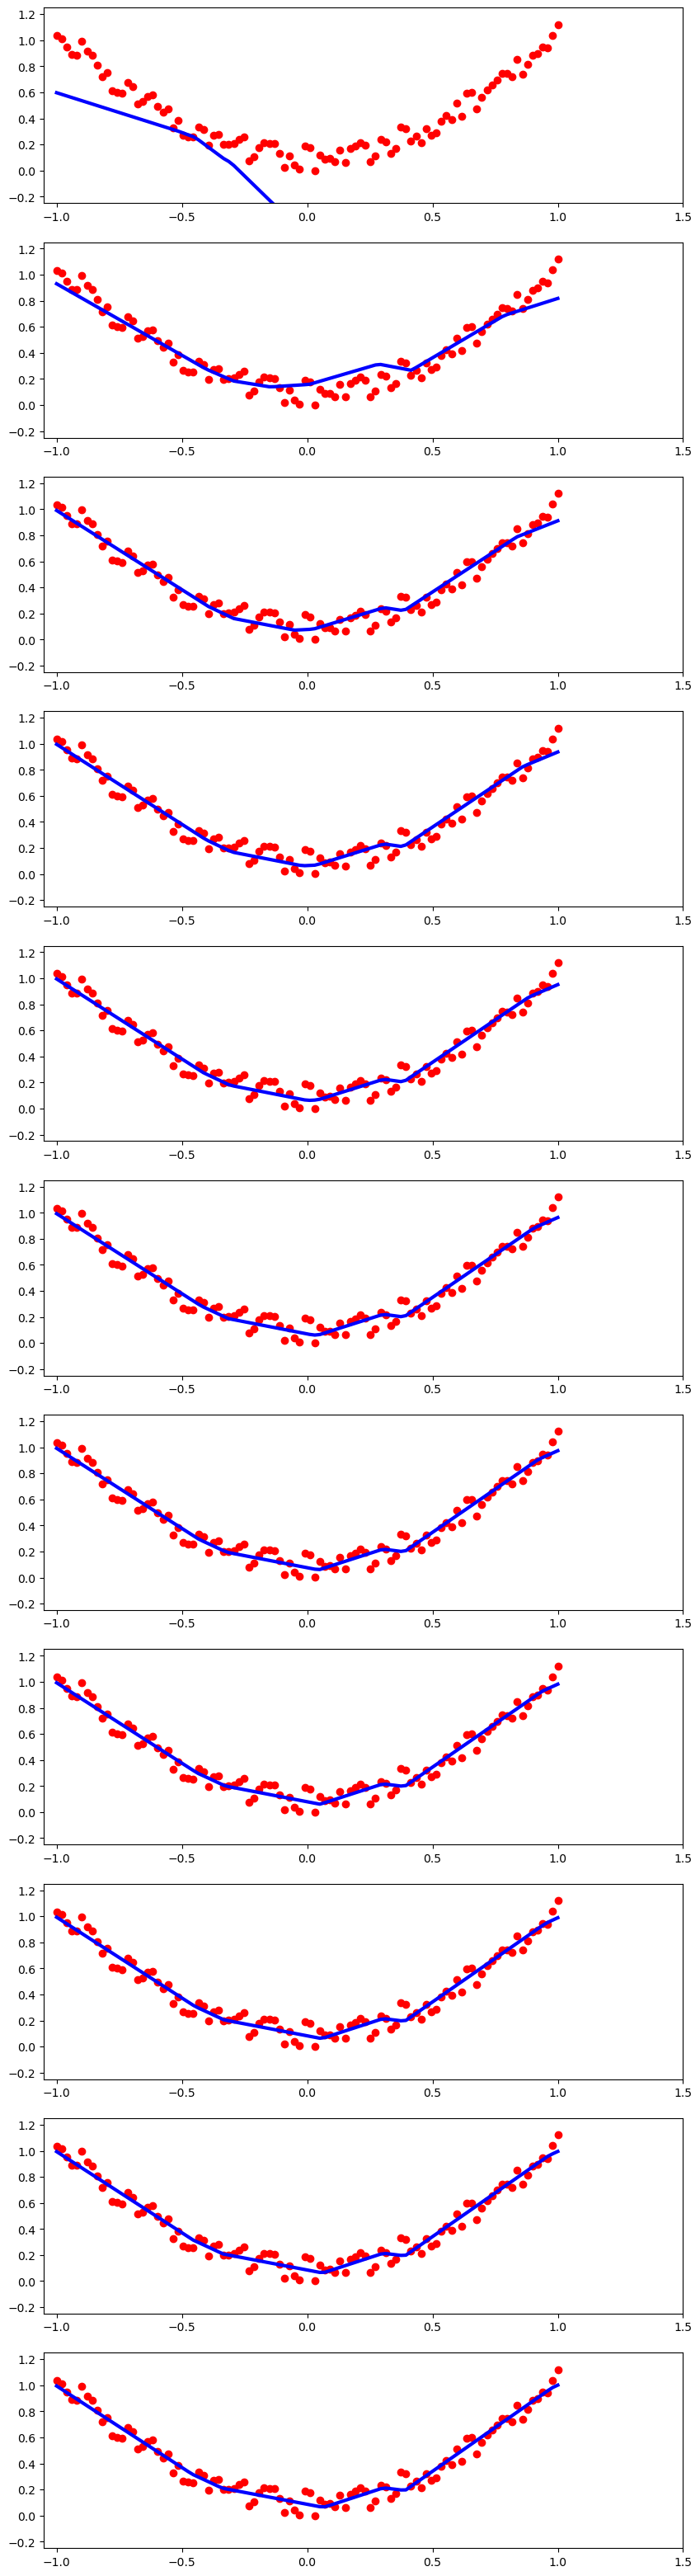

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
    ax.scatter(X.numpy(), y.numpy(), color="red")
    ax.plot(X.numpy(), y_.numpy(), 'blue', lw=3)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)

По графику видим, что созданная сеть выполняет поставленную задачу по регрессии: из-за сокращения ошибки синяя линия проходит все ближе и ближе с красными точками, особо хорошо это видно, если сравнивать 1 и последний график